## Week 5 : Dimensionality Reduction & Principal Component Analysis
```
- Machine Learning, Innopolis University (Fall semester 2021)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>


```
Lab Plan
1. Understand basic steps of PCA
2. PCA from Sklearn
3. Application of PCA (optional)

```

<hr>

## 1. Principal Component Analysis (PCA)

1. How does PCA reduce data dimensionality? 
2. What is eigenvector? 

Task: Now you will implement basic steps of PCA: mean-centering, eigenvectors calculation using covariance matrix, projecting data to the first PC, and restoring it back.

### 1.1 Import Libraries

In [1]:
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1.2 Generating data 

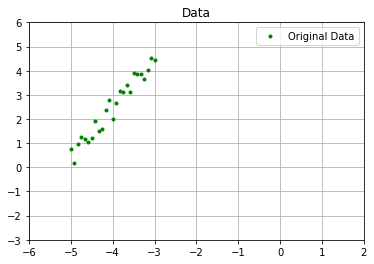

In [2]:
# N is a sample size
N = 25
# we can fix a random seed. It allows us to get the same data
np.random.seed(10)
# form our data
x = np.linspace(-5, -3, N)
y = 10 + 2*x + np.random.random(size=(N,))
data = np.stack([x,y], axis = 1)


plt.title("Data")
plt.plot(data[:,0], data[:,1], '.', label='Original Data', color="green")
plt.legend()

plt.axis([-6, 2, -3, 6])
plt.grid('True')

### 1.3 Center data

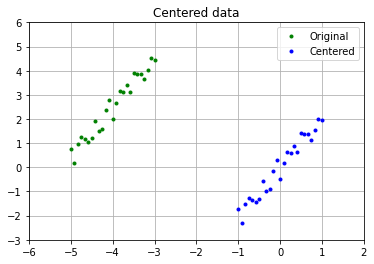

In [3]:
# TODO: center data by subtracting mean value from each feature
# pay attention to mean_vector <-- we need it later for restoring our data
mean_vector = None
data_centered = None

plt.title("Centered data")
plt.plot(data[:,0], data[:,1], '.', color="green", label="Original")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue", label="Centered")
plt.axis([-6, 2, -3, 6])
plt.legend()
plt.grid('True')

### 1.4 Covariance matrix

In [4]:
# TODO: calculate covariance matrix for our centered data
cov_mat = None
print('Covariance matrix:\n', cov_mat)

# also, to make sure you understand how to calculate covariance, calculate and print cov(X,Y)
# check that it is the same as in the covariance matrix
cov_xy = 1/(N-1) * np.sum(data_centered[:,0] * data_centered[:,1])
print('cov(X,Y):', cov_xy)

Covariance matrix:
 [[0.37615741 0.76801889]
 [0.76801889 1.65019543]]
cov(X,Y): 0.7680188927863001


### 1.5 Eigenvectors and eigenvalues

In [5]:
# TODO: compute eigenvectors and eigenvalues, print them
eig_values, eig_vectors = None
print('eig_values:', eig_values)
print('eig_vectors:\n', eig_vectors)

# are they already in the needed order?
# TODO: order eigenvectors and eigenvalues by eigenvalues, descending
idx = None

eig_values = eig_values[idx]
eig_vectors = eig_vectors[:,idx]
print('\nsorteed eig_values:', eig_values)
print('sorted eig_vectors:\n', eig_vectors)

# estimate variance retained by each principal component
retained_var = eig_values / eig_values.sum()
print('\nretained variance:',   retained_var)

eig_values: [0.01535567 2.01099716]
eig_vectors:
 [[-0.90509952 -0.42519979]
 [ 0.42519979 -0.90509952]]

sorteed eig_values: [2.01099716 0.01535567]
sorted eig_vectors:
 [[-0.42519979 -0.90509952]
 [-0.90509952  0.42519979]]

retained variance: [0.99242201 0.00757799]


### 1.6 Project data 

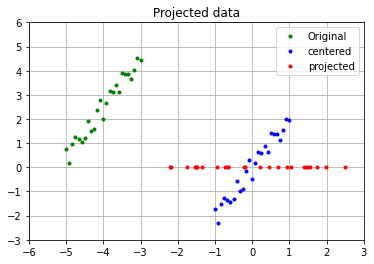

In [6]:
# TODO: project data to the first principal component
first_pc = np.expand_dims(eig_vectors[:,0], axis=1)
projected_data = None #TODO: Dot product

plt.title("Projected data")
plt.plot(data[:,0], data[:,1], '.', color="green", label="Original")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue", label="centered")
plt.plot(projected_data, np.zeros(len(projected_data)), '.', color="red",  label="projected")
plt.axis([-6, 3, -3, 6])
plt.legend()
plt.grid('True')

### 1.7 Restore data back 

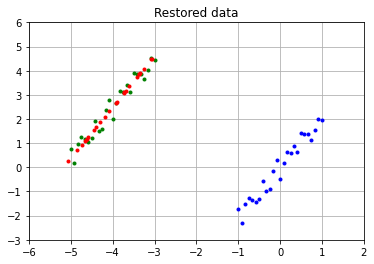

In [7]:
# TODO: project data back to initial space
# remember to add a mean_vector to the restored data
restored_data = None

plt.title("Restored data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.plot(restored_data[:,0], restored_data[:,1], '.', color="red")
plt.axis([-6, 2, -3, 6])
plt.grid('True')
plt.show()

## 2. SKLEARN implementation 

[-4.          2.50055666]
[[-0.42519979 -0.90509952]]
[2.01099716]
[0.99242201]


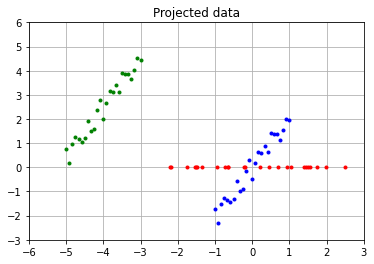

In [8]:
# this is to check your solution
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x_PCA = pca.fit_transform(data)

plt.title("Projected data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.plot(x_PCA, np.zeros(len(projected_data)), '.', color="red")
plt.axis([-6, 3, -3, 6])
plt.grid('True')

print(pca.mean_)
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)